# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.shape
#df.city_type.unique()
#df.info()

(50000, 28)

In [87]:
df.columns

Index(['Period', 'age', 'gender', 'city_type', 'full_mob', 'ml_balance',
       'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'min_td_balance_1q',
       'max_td_balance_1q', 'avg_td_balance_1Y', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'avg_loan_balance_1Y', 'min_cl_balance_1q',
       'max_cl_balance_1q', 'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx',
       'avgtrx_to_balance', 'nbi'],
      dtype='object')

In [5]:
df.insert(0,'Period',(range(1,50001)))
df.head()


,Period,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,1,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,3,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,4,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,5,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


Relational Plots, sns.relplot()


## Линейная диаграмма

Relational Plots, sns.relplot()

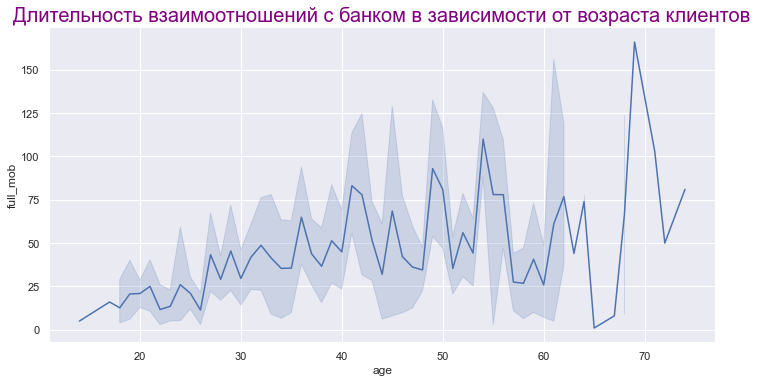

In [46]:
sns.set(style='darkgrid')  

sns.relplot(
    x='age',
    y='full_mob', 
    data=df.query("Period < 300"), 
    kind='line',
    aspect=2
)
plt.title('Длительность взаимоотношений с банком в зависимости от возраста клиентов', size=20, color='purple');

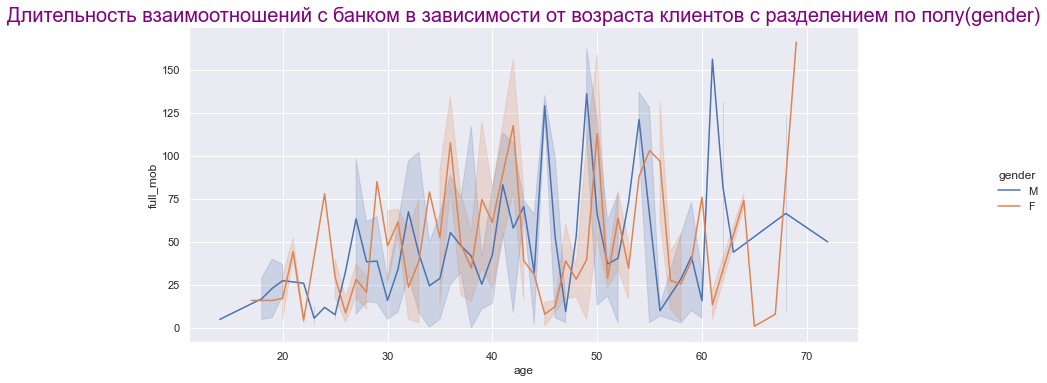

In [45]:
sns.relplot(x='age',
            y='full_mob',
            hue='gender',
            hue_order=["М", "F"],
            data=df.query("Period < 300"),
            aspect=2,
            kind='line')
plt.title('Длительность взаимоотношений с банком в зависимости от возраста клиентов с разделением по полу(gender)', size=20, color='purple');

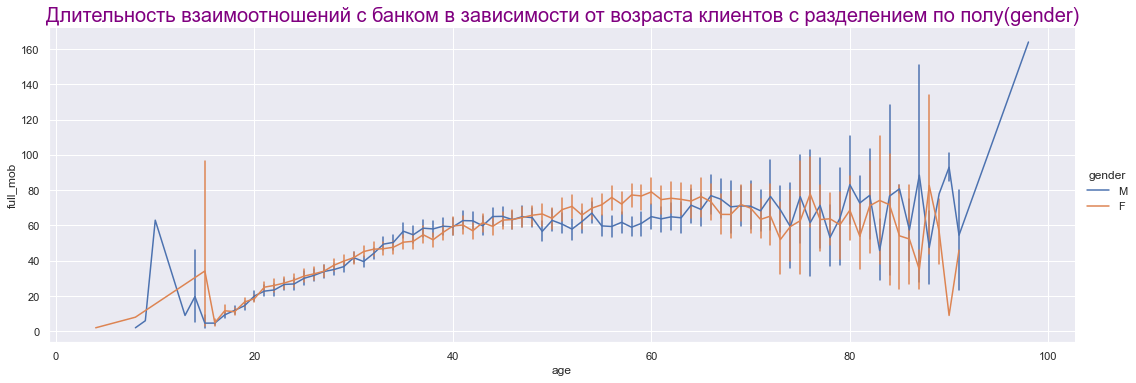

In [44]:
#Линейная диаграмма со стандартной ошибкой bar and hue
sns.relplot(
    x='age', 
    y='full_mob', 
    hue='gender', 
    data=df, 
    kind='line',
    aspect=3,
    err_style="bars", 
    ci=99)   # Standard Errors
plt.title('Длительность взаимоотношений с банком в зависимости от возраста клиентов с разделением по полу(gender)', size=20, color='purple');


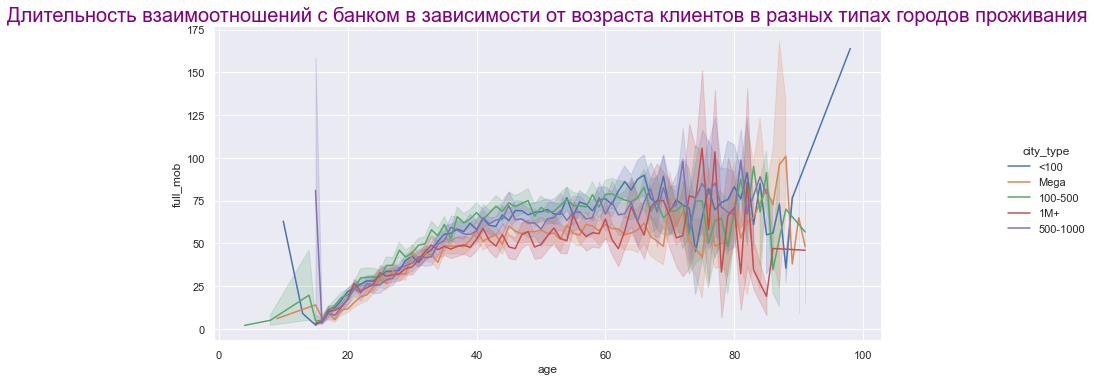

In [50]:
#Линейная диаграмма с параметром hue=city_type
type_of_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='age', 
    y='full_mob', 
    hue='city_type', 
    hue_order=type_of_city,
    data=df,
    aspect=2,
    kind='line')
plt.title('Длительность взаимоотношений с банком в зависимости от возраста клиентов в разных типах городов проживания', size=20, color='purple');

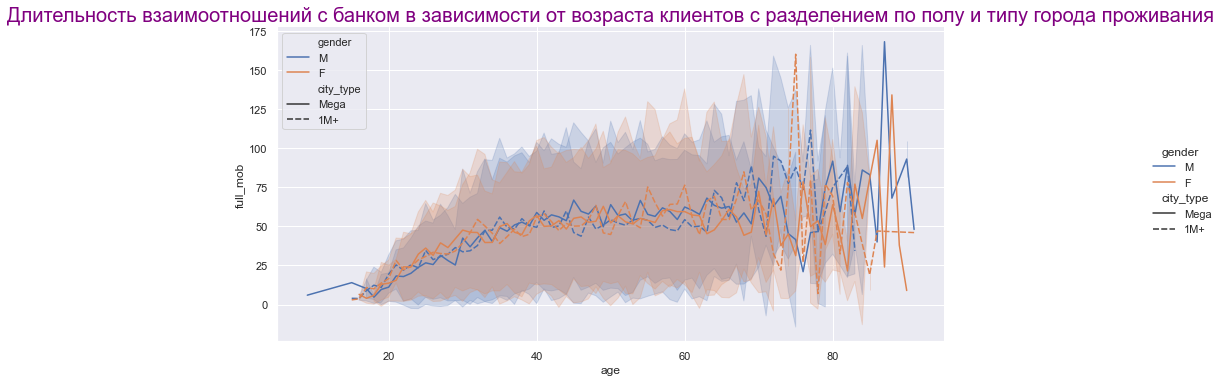

In [54]:
#Линейная диаграмма с параметрами hue и style
sns.relplot(
    x='age',
    y='full_mob',
    hue='gender',
    style='city_type',
    style_order=["Mega", "1M+"], 
    kind='line', 
    ci='sd',
    aspect=2,
    data=df)
plt.title('Длительность взаимоотношений с банком в зависимости от возраста клиентов c разделением по полу и типу города проживания', size=20, color='purple');
plt.legend()

In [102]:
df1 =df.sort_values(by=['age'], ascending=True).query('casa_balance_0m>0').groupby(['age','gender','city_type'])['casa_balance_0m'].agg(total=(sum))
#отсортировали на увеличение по возрасту, взяли клиентов только с положительными остатками на счетах
#сгруппировали по возрасту, полу, и типам городов проживания и просуммировали остатки на счетах по данным группам клиентов
df1.head()

total
age gender city_type              
4   F      100-500    4.075974e+04
8   F      100-500    2.711380e+05
    М      100-500    6.134000e+06
9   М      Mega       2.103752e+06
10  М      <100       1.764209e+05

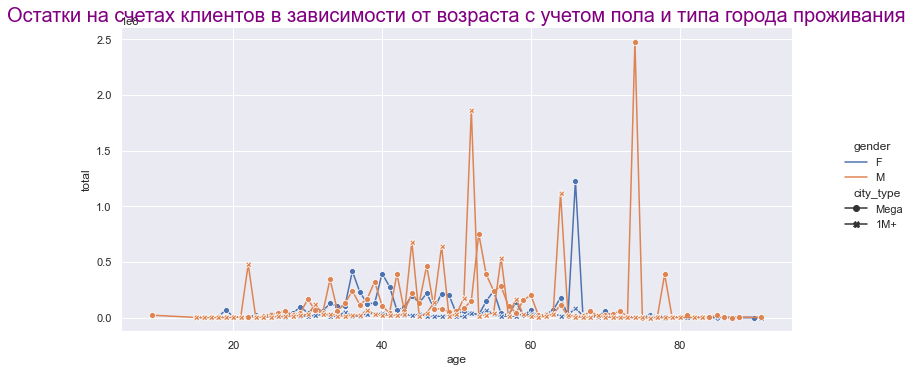

In [103]:
#Линейная диаграмма с параметрами hue и style
sns.relplot(
    x='age',
    y='total', 
    hue='gender', 
    style='city_type',
    style_order=["Mega", "1M+"],
    dashes=False, 
    markers=True,
    data=df1, 
    kind='line',
    aspect=2,
    ci=None)
plt.title('Остатки на счетах клиентов в зависимости от возраста с учетом пола и типа города проживания', size=20, color='purple');

In [10]:
long_df = pd.melt(df, var_name='qwartal',value_name='q_values',
            id_vars=['Period','age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'avg_casa_balance_1Y', 'avg_td_balance_1Y', 
       'avg_loan_balance_1Y', 'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi']  ) 
           
long_df.shape
long_df.head()  

(400000, 23)

,Period,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,...,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,qwartal,q_values
0,1,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,...,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,min_casa_balance_1q,0.0000
1,2,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,...,4716.127317,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,min_casa_balance_1q,3272.9367
2,3,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,...,10239.601283,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,min_casa_balance_1q,6249.7550
3,4,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,...,13905.841283,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,min_casa_balance_1q,14354.9370
4,5,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,...,96089.612758,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,min_casa_balance_1q,91511.7691


## Линейные диаграммы из датафрейма длинной формы


In [15]:
qw=long_df.query("qwartal=='max_td_balance_1q' & td_balance_0m>0 ")
#отфильтровали квартальные показатели по депозитам для тех клиентов, у которых остатки положительные


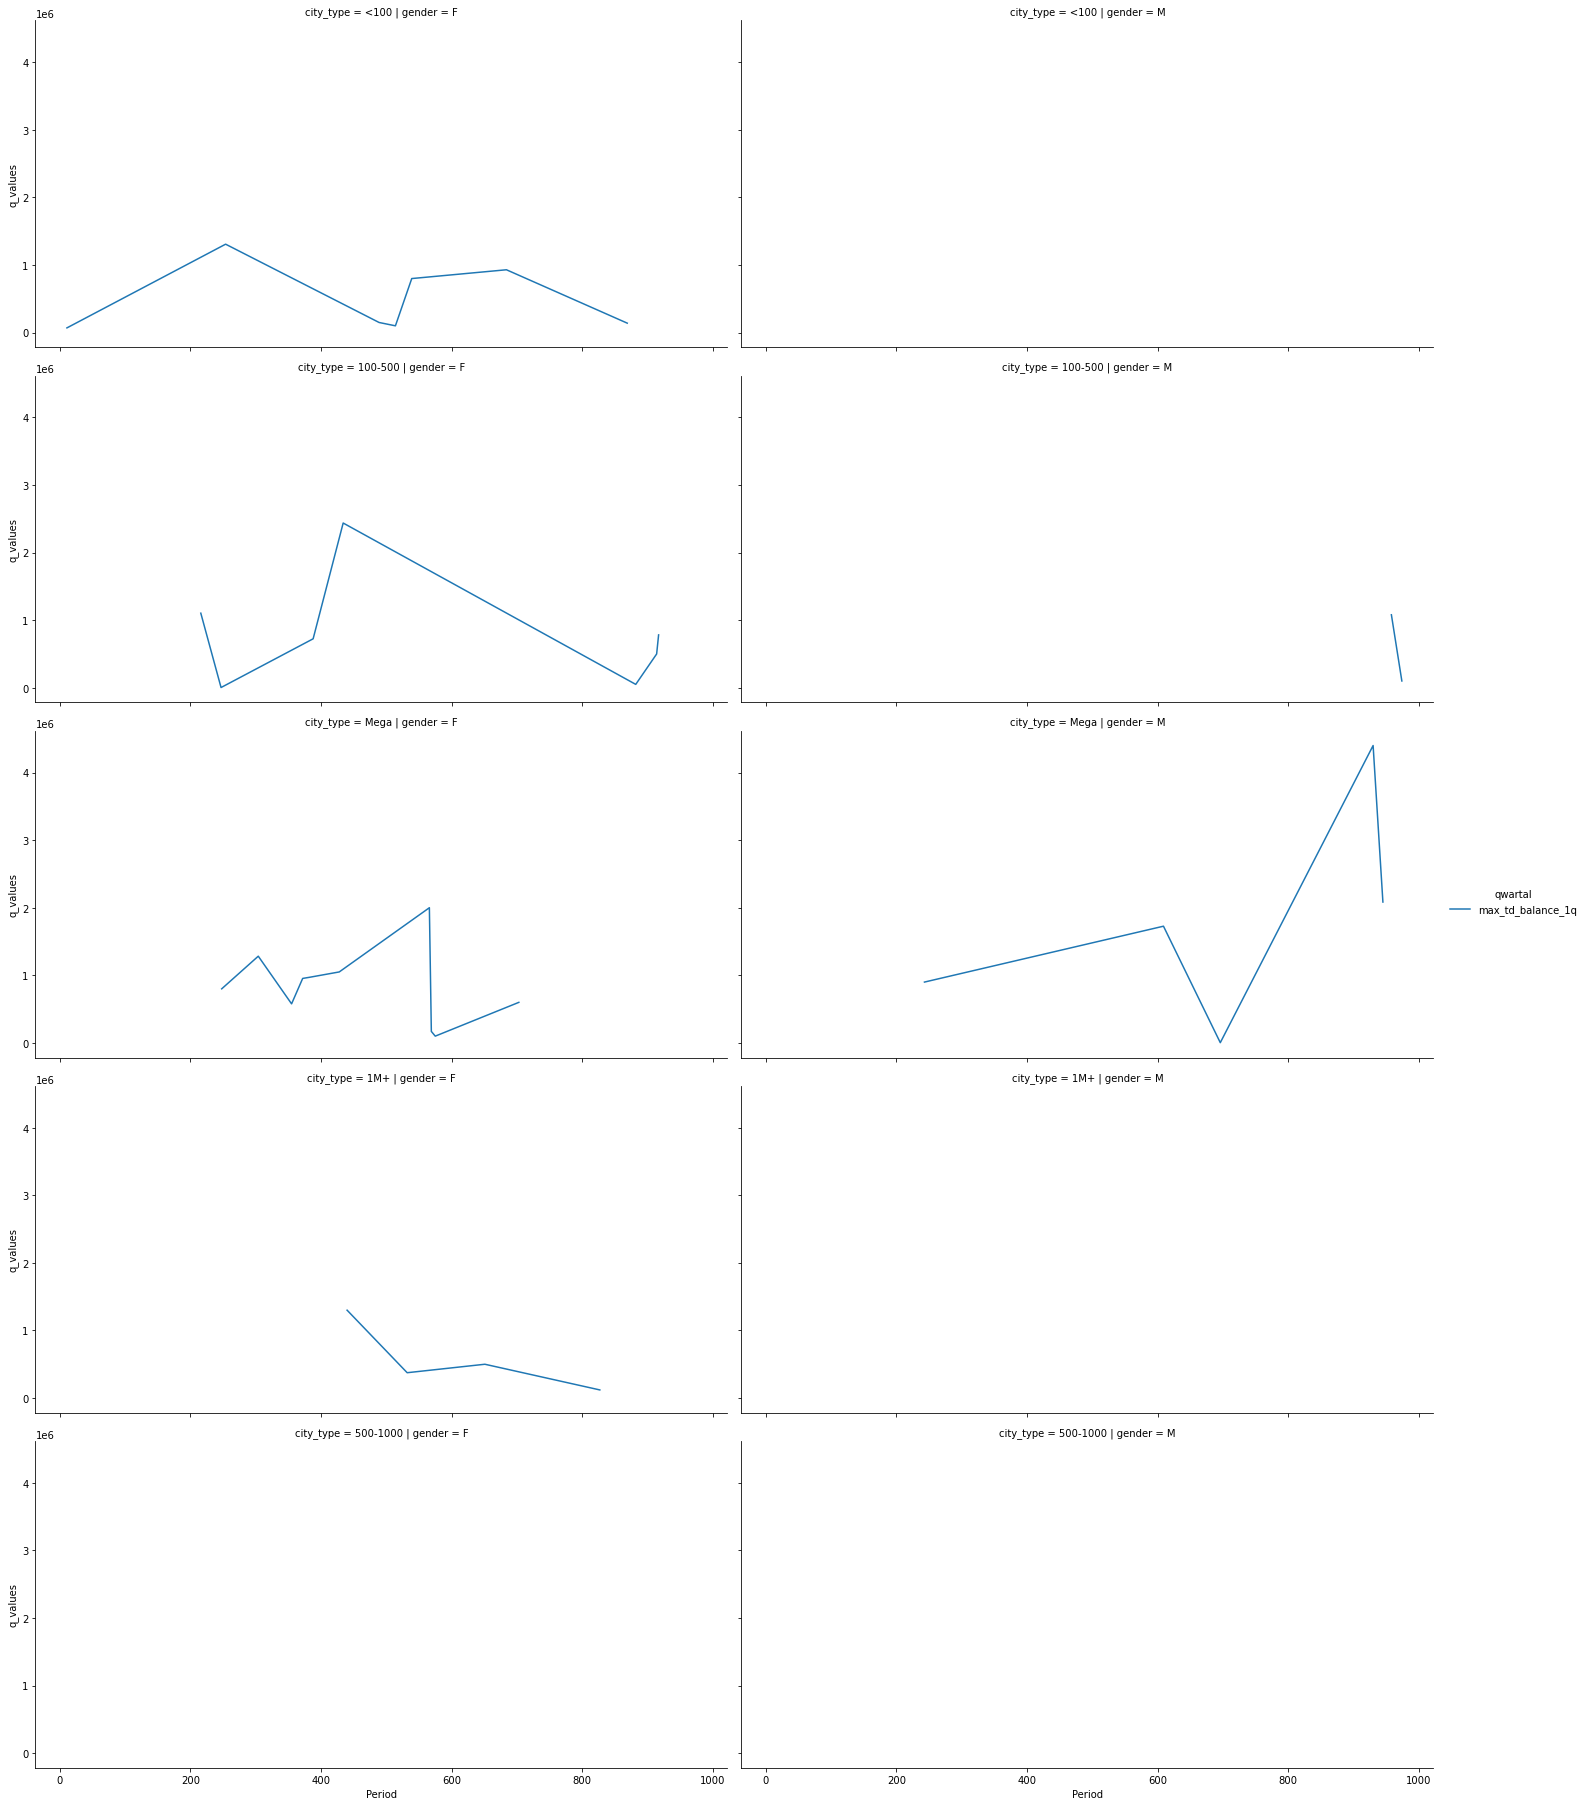

In [25]:
# квартальные показатели (max) по продуктам с разбивкой по полу и типу города проживания на выборке до 1000 клиентов
g = sns.relplot(
    x='Period', 
    y='q_values', 
    data=qw.query("Period < 1000"), 
    kind='line', 
    hue='qwartal', 
    col='gender',
    aspect=2, 
    row='city_type')

## Scatterplot()

In [246]:
loan = df.query('loan_balance_0m >0')

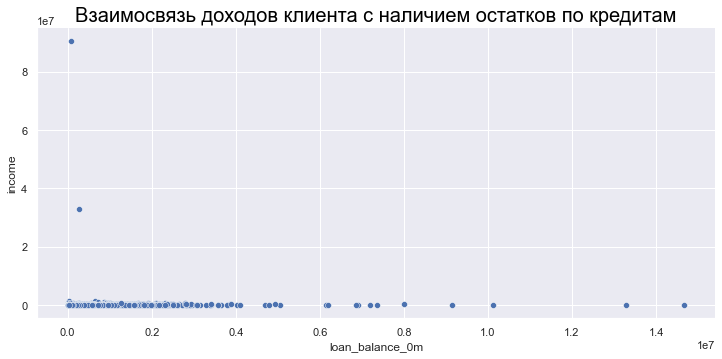

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Диаграмма рассеяния
sns.relplot(
    x='loan_balance_0m',
    y='income',
    data=loan,
    aspect=2,
    kind='scatter'
     
)
plt.title('Взаимосвязь доходов клиента с наличием остатков по кредитам', size=20, color='black');
# Взаимосвязь отсутствует, корреляции нет

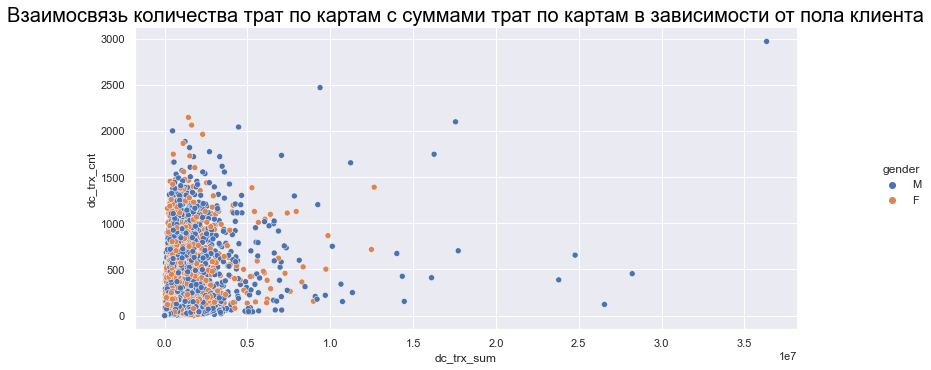

In [253]:
#Диаграмма рассеяния с параметром hue
sns.relplot(
    x='dc_trx_sum', 
    y='dc_trx_cnt', 
    hue='gender', 
    data=df,
    aspect=2)
plt.title('Взаимосвязь количества трат по картам с суммами трат по картам в зависимости от пола клиента', size=20, color='black');
# чем больше количеств трат, тем меньше сумма

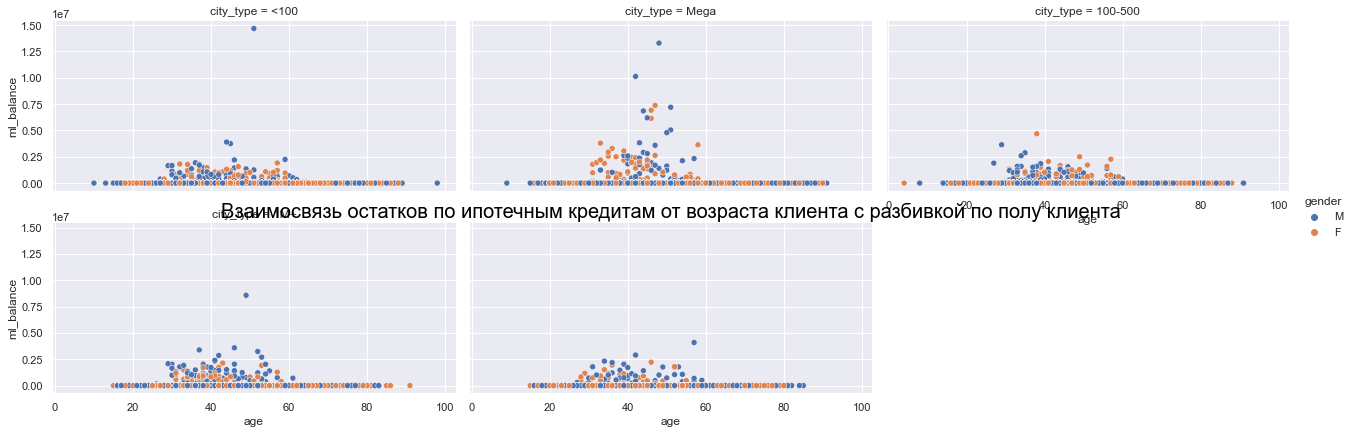

In [259]:
#Диаграмма рассеяния с параметром Hue и дополнительными переменными
type_of_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    y='ml_balance',
    x='age',
    hue='gender',
    col='city_type',
    col_wrap=3, #сколько колонок будем выводить в одной строке
    col_order=type_of_city,
    data=df,
    height=3,
    aspect=2
)
plt.title('Взаимосвязь остатков по ипотечным кредитам от возраста клиента с разбивкой по полу клиента', size=20, color='black');
#Остатки по ипотечным кредитам выше в возрасте от 30 до 60 лет

## Категорийные диаграммы, sns.catplot()

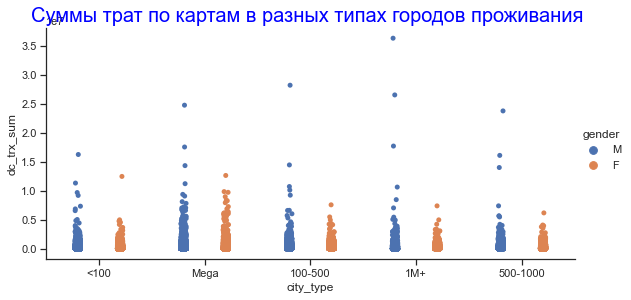

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

type_of_city = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type',
    y='dc_trx_sum', 
    data=df, 
    hue='gender',    
    order=type_of_city, 
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
plt.title('Суммы трат по картам в разных типах городов проживания ', size=20, color='blue');

In [29]:
cl = df.query("cl_balance_0m<100000 & cl_balance_0m>0")
#отфильтровали остатки по кредитам более 0 и до 100000

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Потребительские кредиты с разбивкой по типам городов проживания и полу клиента')

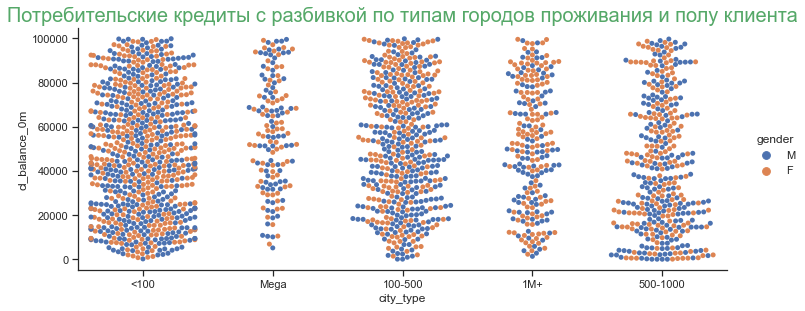

In [30]:

sns.catplot(
    x='city_type',
    y='cl_balance_0m', 
    data=cl, 
    order=type_of_city, 
    hue='gender',
    kind='swarm',
    height=4, 
    aspect=2.5)
plt.title('Потребительские кредиты с разбивкой по типам городов проживания и полу клиента', size=20, color='g')

## boxplot(), kind='box'
## boxnplot(), kind='boxn'


In [32]:
long_df1 = pd.melt(df, var_name='credits',value_name='cr_values',
            id_vars=[
                'Period', 'age', 'gender', 'city_type', 'full_mob', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'min_td_balance_1q',
       'max_td_balance_1q', 'avg_td_balance_1Y', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'avg_loan_balance_1Y', 'min_cl_balance_1q',
       'max_cl_balance_1q', 'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx',
       'avgtrx_to_balance', 'nbi'
            ])
long_df1.head(3)
long_df1.query("credits=='ml_balance'")[['cr_values']].sum()
long_df1.query("credits=='cl_balance_0m'")[['cr_values']].sum()

,Period,age,gender,city_type,full_mob,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,credits,cr_values
0,1,71,NaN,<100,103,0.0,0.0,0.0000,0,0.00,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ml_balance,0.0
1,2,49,NaN,Mega,81,0.0,0.0,3272.9367,0,0.00,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,ml_balance,0.0
2,3,56,NaN,Mega,81,0.0,0.0,6249.7550,6,5128.02,...,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,ml_balance,0.0


cr_values    6.440722e+08
dtype: float64

cr_values    3.016845e+09
dtype: float64

Text(0.5, 1.0, 'Распределение клиентов в зависимости от возраста и типа города проживания')

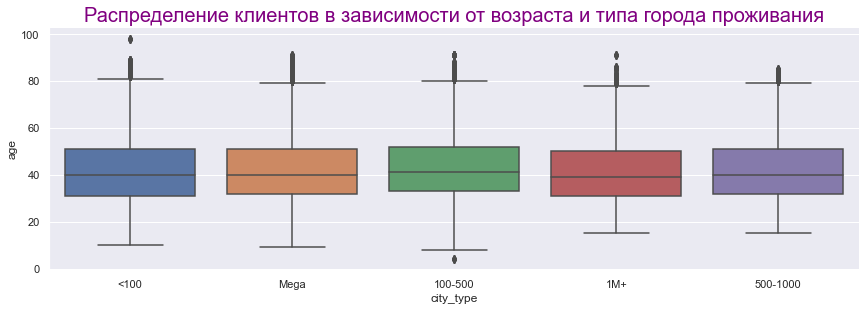

In [243]:
sns.set(style='darkgrid')
city_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type', 
    y='age', 
    data=long_df, 
    kind='box', 
    height=4, 
    aspect=3
)
plt.title('Распределение клиентов в зависимости от возраста и типа города проживания', size=20, color='purple')

Text(0.5, 1.0, 'Остатки по кредитам в зависимости от типа города проживания')

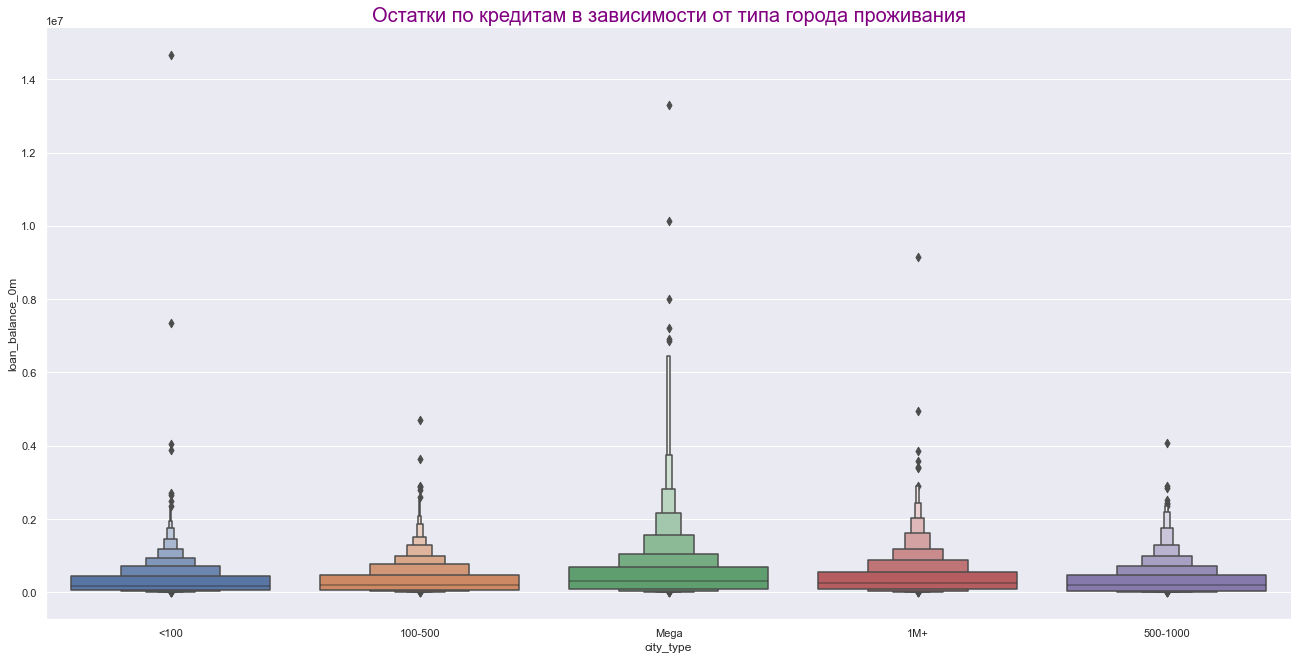

In [245]:
sns.catplot(
    x='city_type', 
    y='loan_balance_0m', 
    data=df.query('loan_balance_0m>0') ,
    kind='boxen',  
    height=9, 
    aspect=2); 
plt.title('Остатки по кредитам в зависимости от типа города проживания', size=20, color='purple')

In [240]:
df3 = df.query('loan_balance_0m>0 & Period<20' )
df3

,Period,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
9,10,36,М,<100,154,0.0,0.00,32413.52,0.0,0.00,...,32413.52,34119.49,38051.374167,0.00,0.00,0.00000,NaN,3915.032892,4.383411,6065.052515
10,11,56,F,<100,165,0.0,0.00,61189.99,70000.0,1524.58,...,44360.86,61189.99,43218.413333,0.00,0.00,0.00000,0.617406,1323.992698,0.226536,8009.940315
14,15,50,F,100-500,156,0.0,0.00,521337.41,0.0,50.02,...,521337.41,530412.52,374931.774170,0.00,0.00,0.00000,NaN,15225.000000,40.617059,57309.483796
16,17,28,М,<100,63,0.0,179900.88,179900.88,0.0,12933.52,...,179900.88,185468.55,193872.628330,179900.88,185468.55,193872.62833,NaN,NaN,NaN,21894.257314


Text(0.5, 1.0, 'Остатки по кредитам в зависимости от типа города проживания с разбивкой по полу клиента')

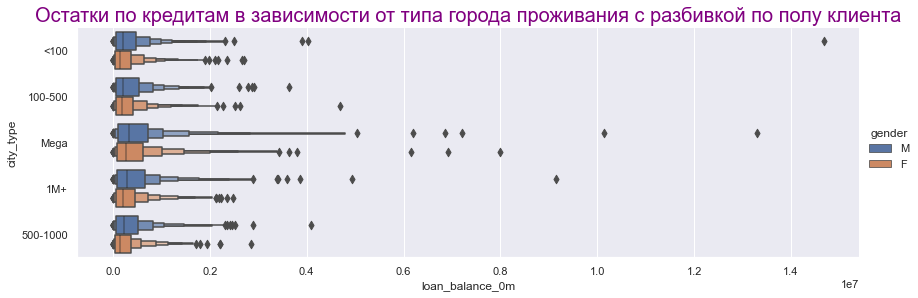

In [248]:

sns.catplot(
    x='loan_balance_0m', 
    y='city_type', 
    data=df.query('loan_balance_0m>0'), 
    kind='boxen', 
    hue='gender',
    hue_order=["М", "F"], 
    height=4, 
    aspect=3)
plt.title('Остатки по кредитам в зависимости от типа города проживания с разбивкой по полу клиента', size=20, color='purple')

## barplot(), kind='bar'
## countplot(), kind='count'

AttributeError: 'AxesSubplot' object has no property 'log'

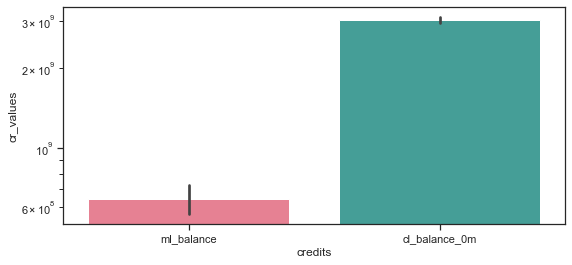

In [33]:
from numpy import median
plt.figure(figsize=(9,4))
b = sns.barplot(
    x='credits',
    y='cr_values', 
    data=long_df1, 
    estimator = np.sum, 
    palette='husl',
    log=True)

b.set(yscale='log', log=True, ylim=[50000, 1000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'

    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');
# !!!!!!!!не нашла, что с настройками, аннотации не отображаются!!!!!!

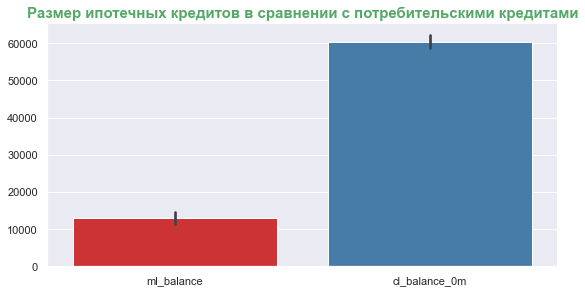

In [282]:
sns.catplot(
    data=df, 
    kind='bar', 
    height=4, 
    aspect=2,   
    order=['ml_balance','cl_balance_0m'],
    palette="Set1"
); 
plt.title('Размер ипотечных кредитов в сравнении с потребительскими кредитами', size=15, color='g', 
          weight='bold');

In [47]:
long_df2 = pd.melt(df, var_name='year',value_name='y_values',
            id_vars=['Period', 'age', 'gender', 'city_type', 'full_mob', 'ml_balance',
       'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'min_td_balance_1q',
       'max_td_balance_1q', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'min_cl_balance_1q',
       'max_cl_balance_1q', 'loan_to_deposit', 'Avg_trx',
       'avgtrx_to_balance', 'nbi'] ) 
long_df2.year.unique()
#long_df2.query("year=='avg_casa_balance_1Y'")[['y_values']].median()
#long_df2.query("year=='avg_td_balance_1Y'")[['y_values']].median()
#long_df2.query("year=='avg_loan_balance_1Y'")[['y_values']].median()
#long_df2.query("year=='avg_cl_balance_1Y'")[['y_values']].median()

array(['avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y',
       'avg_cl_balance_1Y'], dtype=object)

Text(0.5, 1.0, 'Медианы показателей годовых значений в разрезе продуктов')

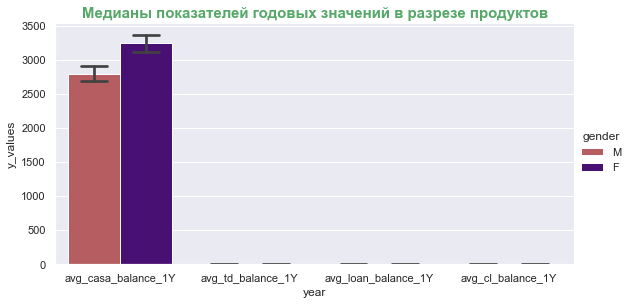

In [327]:
sns.catplot(
    x='year',
    y='y_values', 
    data=long_df2, 
    kind='bar', 
    hue='gender', 
    hue_order=['М','F'], 
    palette={"М": "r", "F": "indigo"},
    estimator=median, 
    capsize=0.2, 
    height=4, 
    aspect=2); 

plt.title('Медианы показателей годовых значений в разрезе продуктов',
          size=15, 
          color='g', 
          weight='bold')


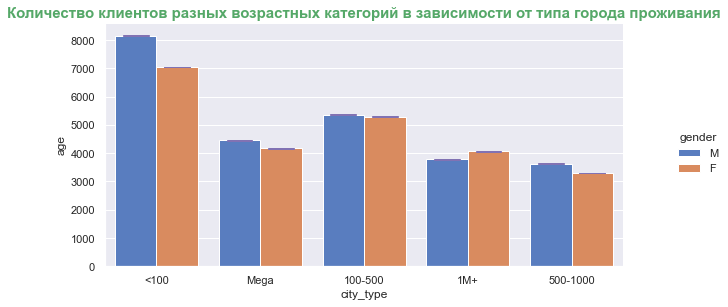

In [334]:
city_order =['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type', 
    y='age', 
    data=df, 
    kind='bar', 
    hue='gender', 
    ci='sd',
    estimator=len, 
    capsize=0.25, 
    errcolor='m', 
    errwidth=1,
    hue_order=['М','F'], 
    palette="muted", 
    order=city_order, 
    height=4, 
    aspect=2);
plt.title('Количество клиентов разных возрастных категорий в зависимости от типа города проживания',
          size=15, 
          color='g', 
          weight='bold'
         );

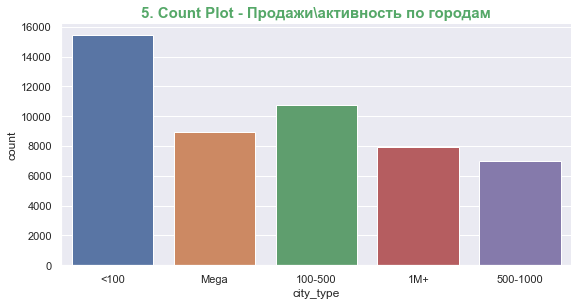

In [337]:
sns.catplot(x='city_type', 
            data=df, 
            kind='count',
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot - Продажи\активность по городам', size=15, color='g', weight='bold');

## violinplot(), kind='violin'

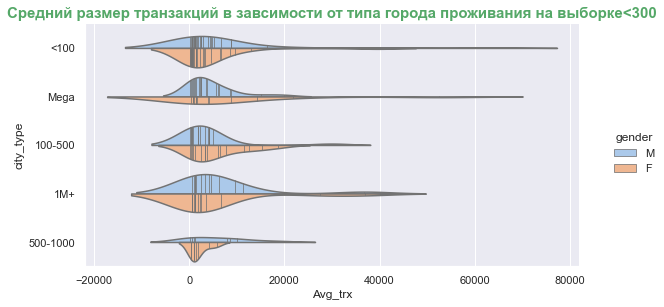

In [346]:
sns.catplot(
    y='city_type', 
    x='Avg_trx', 
    data=df.query('Period<300'), 
    kind='violin', 
    order=city_order, 
    hue='gender', 
    hue_order=["М", "F"], 
    split=True, 
    inner="stick", 
    palette="pastel",
    height=4, 
    aspect=2)
plt.title('Средний размер транзакций в завсимости от типа города проживания на выборке<300', size=15, color='g', weight='bold');

## pointplot(), kind='point'

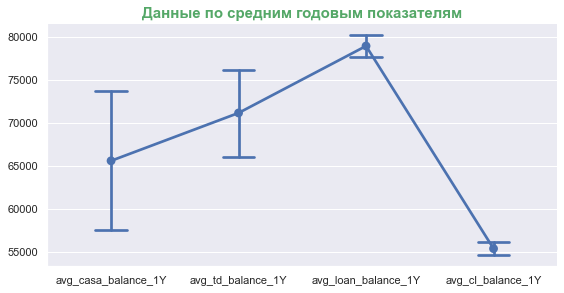

In [349]:
sns.catplot(
    data=df, #wide format
    kind='point', 
    ci=68, 
    capsize=0.25, 
    height=4,       
    aspect=2, 
    order=['avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y',
       'avg_cl_balance_1Y']
)
plt.title('Данные по средним годовым показателям' ,size=15, color='g', weight='bold');

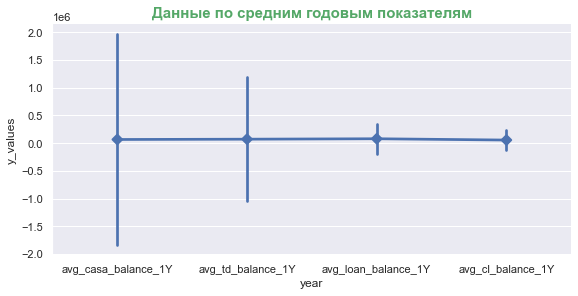

In [351]:
sns.catplot(
    x='year', 
    y='y_values', 
    data=long_df2, # long format
    kind='point', 
    markers='D', 
    ci='sd',
    height=4, 
    aspect=2)  
plt.title('Данные по средним годовым показателям', size=15, color='g', weight='bold');

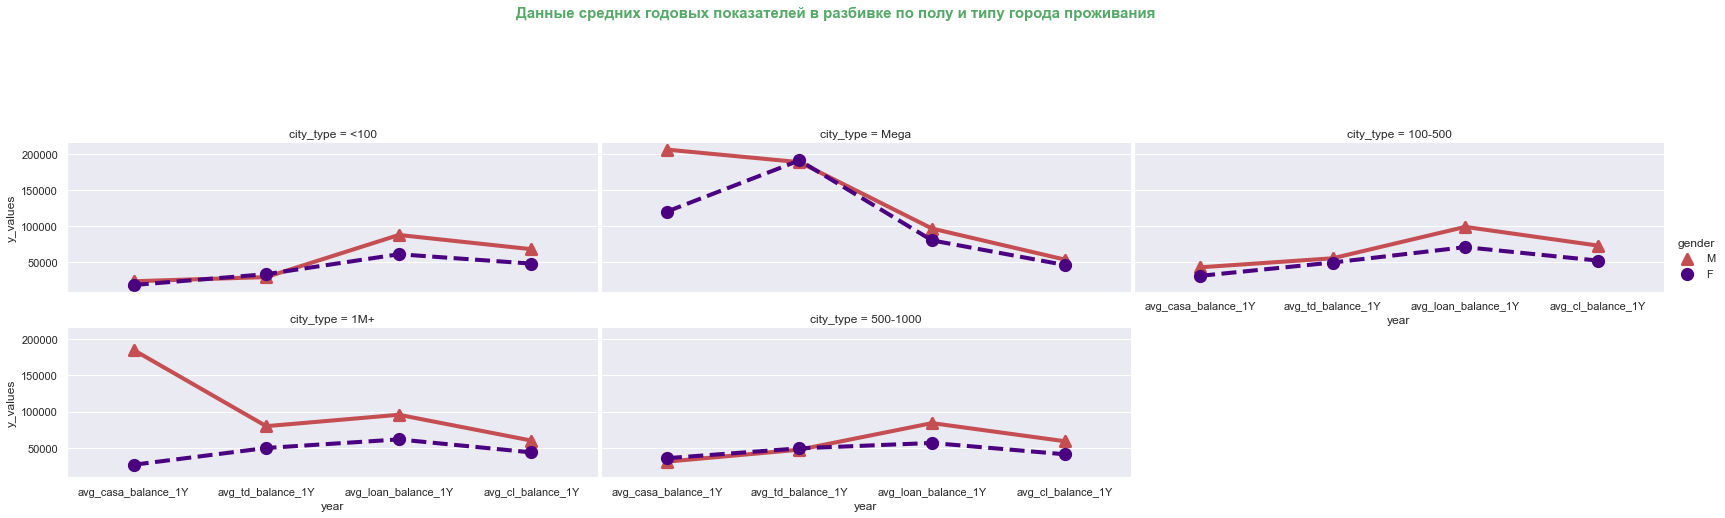

In [353]:
sns.catplot(
    x='year', 
    y='y_values', 
    data=long_df2, 
    kind='point', 
    hue='gender', 
    hue_order=['М','F'], 
    palette={"М": "r", "F": "indigo"},
    markers=["^", "o"], 
    linestyles=["-", "--"], 
    ci=None, 
    col='city_type', 
    col_wrap=3,
    height=4, 
    aspect=2, 
    scale=1.5) #толщина линий на графике
plt.suptitle("Данные средних годовых показателей в разбивке по полу и типу города проживания", size=15, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

## Диаграммы распределения

## distplot() and rugplot()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


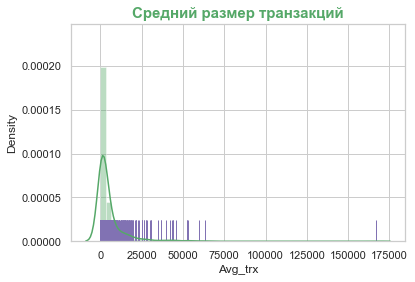

In [360]:
df_period=df.query('Period<1000')#выборка до 1000
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df_period.Avg_trx,
    color='g', 
    rug=True, #фиолетовая линия внизу, показывает насколько плотно распределяются данные
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('Средний размер транзакций', size=15, color='g', weight='bold')
plt.show();

## pairplot(

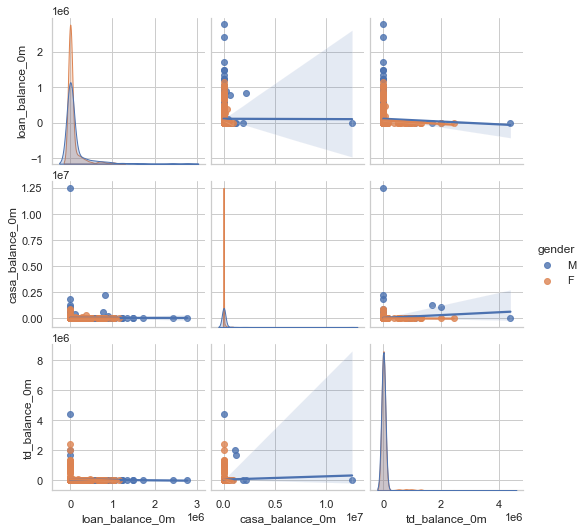

In [363]:
df_items = df.query('Period<1000').loc[:,['loan_balance_0m', 'casa_balance_0m','td_balance_0m','gender']]
sns.pairplot(
    df_items,
    hue='gender',
    kind='reg'#рисует линии регрессии, указывает тренды в наших точках
)
plt.show();
# прямая корреляция между остатками на счетах и остатками на депозитах
# отрицательная корреляция между кредитами и остатками на депозитах

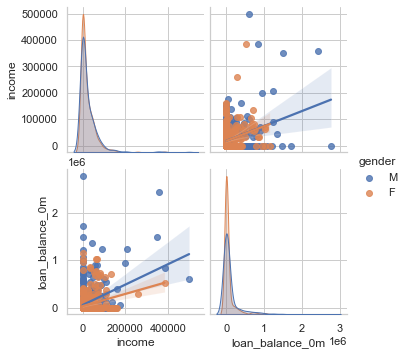

In [369]:
df_items1= df.query('Period<1000').loc[:,['income', 'loan_balance_0m','gender']]#выборка до 1000
sns.pairplot(
    df_items1,
    vars=['income','loan_balance_0m'],
    hue='gender', kind='reg')
plt.show();
#прямая корреляция между кредитами и доходом на выборке до 1000

In [42]:
df_series = df.query('Avg_trx>0').groupby('city_type')['Avg_trx'].sum()
df_series.head()

city_type
100-500     3.483457e+07
1M+         2.490253e+07
500-1000    2.287864e+07
<100        4.644776e+07
Mega        4.055180e+07
Name: Avg_trx, dtype: float64

<AxesSubplot:ylabel='city_type'>

Text(0.5, 1.0, 'Средний размер транзакций')

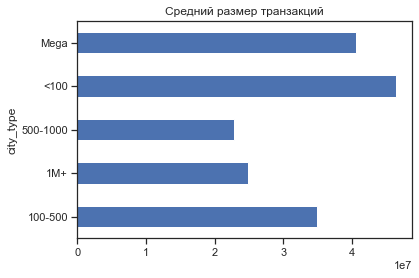

In [44]:
df_series.plot(kind='barh')
plt.title('Средний размер транзакций')
plt.show()

<AxesSubplot:ylabel='city_type'>

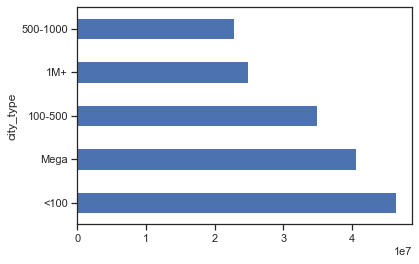

In [45]:
#отсортировали по возрастанию 
df_series.sort_values(ascending=False).plot(kind='barh')
plt.show()

In [48]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import random

In [81]:
groups = []
group_num = ['ml_balance','cl_balance_0m','td_balance_0m','casa_balance_0m']
for x in range(long_df_prod.shape[0]):
      groups.extend(random.sample(group_num,1) )

In [82]:
long_df_prod['groups']=groups

In [88]:
# Добавляем интерактивность
def box_plotter(df, group):
    term = df['groups'] == group
    sns.catplot(x='city_type', 
            y='pr_values',
            aspect=2,
            kind="box", 
            showfliers=False,
            data=df[term]);

def f(group):
    ''' Запускаем боксплот '''
    box_plotter(long_df_prod,group)

In [91]:
interact(f, group=group_num)
# Данные по продуктам банка

interactive(children=(Dropdown(description='group', options=('ml_balance', 'cl_balance_0m', 'td_balance_0m', '…

<function __main__.f(group)>

## Матричные диаграммы
## heatmap()

In [18]:
long_df_prod= pd.melt(df, var_name='products',value_name='pr_values',
            id_vars=['Period', 'age', 'gender', 'city_type', 'full_mob',
        'loan_balance_0m','dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'min_td_balance_1q',
       'max_td_balance_1q', 'avg_td_balance_1Y', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'avg_loan_balance_1Y', 'min_cl_balance_1q',
       'max_cl_balance_1q', 'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx',
       'avgtrx_to_balance', 'nbi'] ) 

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Подготовим данные в сводной таблице, группируя продукты и тип города прожиания
products_data= pd.DataFrame(long_df_prod.groupby(["city_type", "products"]).pr_values.mean().round(2))
products_data = products_data.reset_index()
products_data = products_data.pivot('city_type','products', 'pr_values')
products_data.corr

<bound method DataFrame.corr of products   casa_balance_0m  cl_balance_0m  ml_balance  td_balance_0m
city_type                                                           
100-500           39305.29       67425.98    10124.90       49929.04
1M+               98512.86       56129.78    17193.75       60473.43
500-1000          38067.84       56742.03    10097.15       46269.88
<100              23621.77       63142.91     7644.07       29479.24
Mega             178621.29       53533.50    23568.91      190899.35>

<AxesSubplot:xlabel='products', ylabel='city_type'>

Text(0.5, 1.0, 'Распределение банковских продуктов в зависимости от типа города проживания')

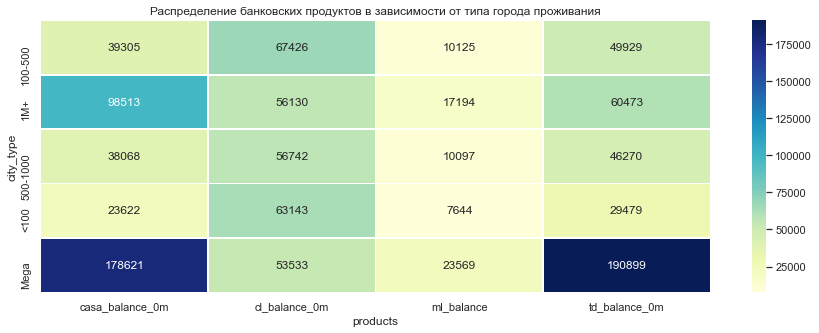

In [72]:
fig, (ax1) = plt.subplots(1, figsize=(15,5)) #размер таблицы

sns.heatmap(
    products_data, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu",
    ax=ax1)
ax1.set_title('Распределение банковских продуктов в зависимости от типа города проживания')

## clastermap()

In [206]:
# Подготовим данные в сводной таблице, группируя продукты и тип города проживания
products_data= pd.DataFrame(long_df_prod.groupby(["city_type", "products"]).pr_values.mean().round(2))
products_data = products_data.reset_index()
products_data = products_data.pivot('city_type','products', 'pr_values')
products_data.corr

<bound method DataFrame.corr of products   casa_balance_0m  cl_balance_0m  ml_balance  td_balance_0m
city_type                                                           
100-500           39305.29       67425.98    10124.90       49929.04
1M+               98512.86       56129.78    17193.75       60473.43
500-1000          38067.84       56742.03    10097.15       46269.88
<100              23621.77       63142.91     7644.07       29479.24
Mega             178621.29       53533.50    23568.91      190899.35>

In [207]:

row_colors = long_df2["y_values"].map(dict(zip(long_df2["y_values"].unique(), 'rbg')))

<ipython-input-208-96b05e99883b>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',


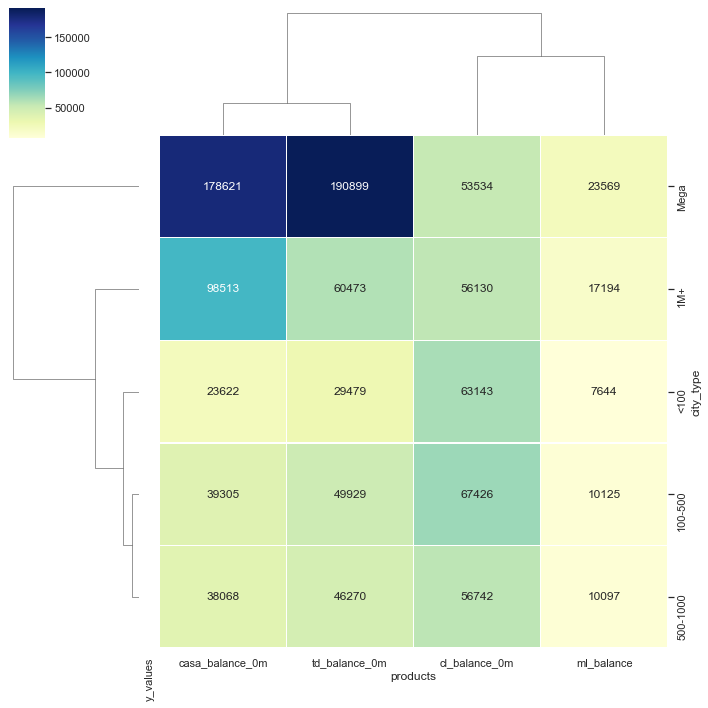

In [208]:
# Визуализация разделения на кластеры
sns.clustermap(products_data, annot = True, row_colors=row_colors, fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu")
    #ax=ax1)
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg', 
            dpi=150, figsize=(8,12))


Вывод: анализируя диаграмму, мы видим:
1) Продукты делятся на 2 кластера (остатки на счетах и депозитах, остатки по ипотечным и потребительским кредитам), эти 2 кластера в свою очередь объединяются в 1 общий кластер банковских продуктов.

2) Все типы городов составляют 1 общий кластер (слева указана разбивка . Города с населением от 100 до 1000 составляют первый кластер, затем к ним примыкает тип города с населением менее 100,1M+ и Mega)

3) В ячейках указаны средние значения показателей в разрезе банковских продуктов и типов городов проживания. Данные показатели  мы анализируем относительно средних годовых по тем же продуктам (т.е. какая доля средних значений по банковским продуктам в общем объеме показателей за год). Видим, что наибольший вес у таких продуктов, как остатки на счетах и депозиты в городах 1М+ и Mega, а также потребительские кредиты во всех типах городов.